In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


%matplotlib inline

# Load the Data

In [3]:
df = pd.read_csv("cleaned_plyear_data.csv")

In [4]:
df

,Team,Position,Height,Age,Appearances,Goals,Assists,Yellow_Cards,Second_Yellow_Cards,Red_Cards,Goals_Conceded,Clean_Sheets,Minutes_Played,Days_Injured,Games_Injured,Award,Current_Value,Highest_Value,Position_Encoded,Winger
0,Manchester United,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
1,Manchester United,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
2,Manchester United,Defender Centre-Back,185.000000,31.0,8,0.000000,0.000000,0.216346,0.0,0.000000,0.000000,0.000000,416,932,169,7,2000000,20000000,2,0
3,Manchester United,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
4,Manchester United,Defender Left-Back,169.000000,23.0,89,0.012619,0.063096,0.227145,0.0,0.000000,0.000000,0.000000,7132,182,15,3,22000000,22000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10298,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10299,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10300,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10301,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,4,0


# Feature selection

In [6]:
df = df[['Position', 'Age', 'Appearances', 'Goals']]


In [7]:
df = pd.get_dummies(df, columns=['Position'])

In [8]:
df.head(2)

,Age,Appearances,Goals,Position_Attack Centre-Forward,Position_Attack-LeftWinger,Position_Attack-RightWinger,Position_Attack-SecondStriker,Position_Defender Centre-Back,Position_Defender Left-Back,Position_Defender Right-Back,Position_Goalkeeper,Position_midfield-AttackingMidfield,Position_midfield-CentralMidfield,Position_midfield-DefensiveMidfield,Position_midfield-LeftMidfield,Position_midfield-RightMidfield
0,30.0,15,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False
1,37.0,4,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False


# Test and Train prepar &  Data Scaling

In [10]:
X = df


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Buliding the Model
Bulid aLogisticr Regression Model

In [12]:
min_samples = 2


In [13]:
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

In [14]:
distances[:,min_samples-1]

array([3.89558181e-02, 5.96046448e-08, 7.79116362e-02, ...,
       2.41048188e-01, 2.15486841e-01, 2.33734909e-01])

# Drawing the k-distance graph

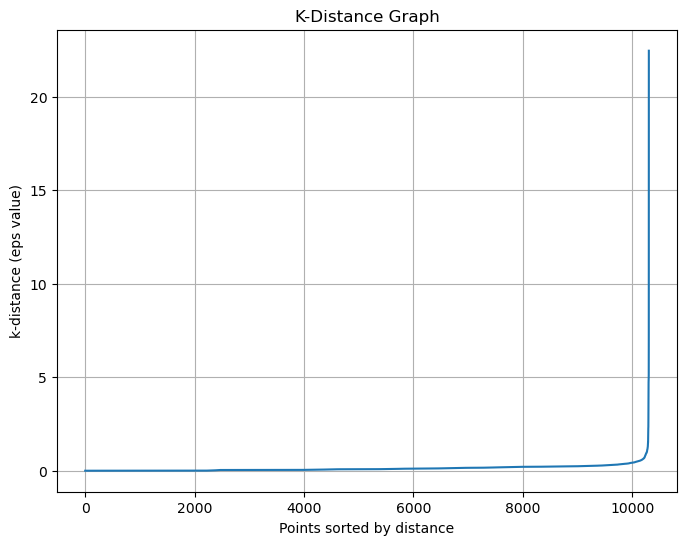

In [16]:
k_dist = distances[:, min_samples-1]

k_dist_sorted = np.sort(k_dist)


plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

## Apply DBSCAN with chosen eps and min_samples

In [18]:
chosen_eps = 1 
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

# Train the model

In [20]:
clusters = dbscan.fit_predict(X_scaled)

In [21]:
pd.Series(clusters).value_counts()

 1     1770
 6     1327
 0     1208
 3     1152
 9      854
 7      845
 2      781
 8      732
 5      673
 4      666
 10      96
 11      89
 12      51
-1       38
 19       4
 14       3
 17       3
 18       3
 13       2
 15       2
 16       2
 20       2
Name: count, dtype: int64

# Evaluating the Model

In [23]:
X.head(2)

,Age,Appearances,Goals,Position_Attack Centre-Forward,Position_Attack-LeftWinger,Position_Attack-RightWinger,Position_Attack-SecondStriker,Position_Defender Centre-Back,Position_Defender Left-Back,Position_Defender Right-Back,Position_Goalkeeper,Position_midfield-AttackingMidfield,Position_midfield-CentralMidfield,Position_midfield-DefensiveMidfield,Position_midfield-LeftMidfield,Position_midfield-RightMidfield
0,30.0,15,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False
1,37.0,4,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False


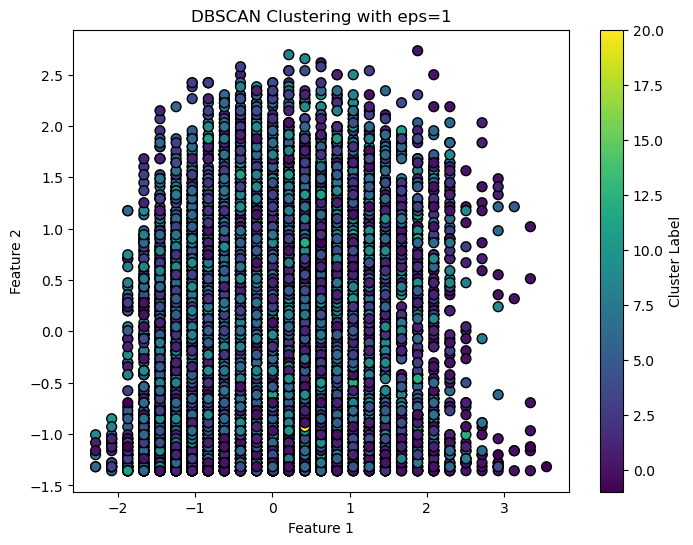

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [25]:
X['dbscan'] = clusters

In [26]:
X['dbscan'].value_counts()

dbscan
 1     1770
 6     1327
 0     1208
 3     1152
 9      854
 7      845
 2      781
 8      732
 5      673
 4      666
 10      96
 11      89
 12      51
-1       38
 19       4
 14       3
 17       3
 18       3
 13       2
 15       2
 16       2
 20       2
Name: count, dtype: int64

<Axes: xlabel='Appearances', ylabel='Age'>

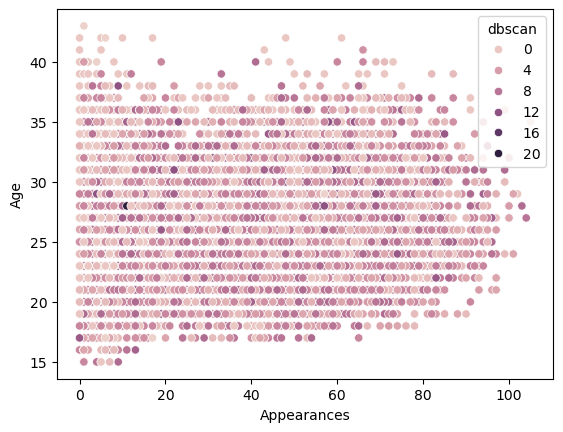

In [28]:
sns.scatterplot(data = X , x = 'Appearances', y = 'Age', hue = 'dbscan')


<Axes: xlabel='Goals', ylabel='Age'>

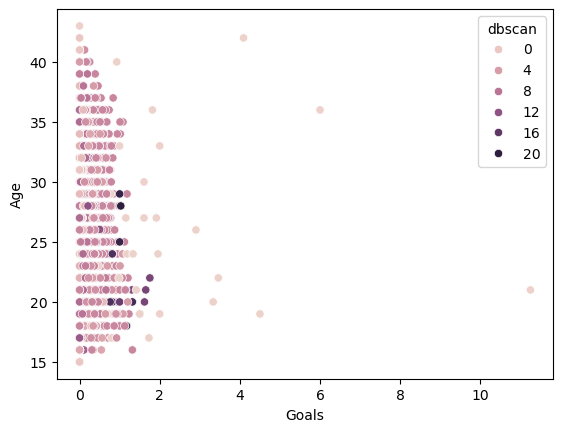

In [30]:
sns.scatterplot(data = X , x = 'Goals', y = 'Age', hue = 'dbscan')
